## **Objective Overview**
##### Build Decision Tree / Random Forest model(s) on the provided dataset.

## **Setup**

#### Install Packages

#### Import Libraries

In [1]:
import pandas as pd
import ast
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
# from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve
# from lime.lime_tabular import LimeTabularExplainer

## **Data Exploration**

#### Load Dataset

In [2]:
data = pd.read_csv('2020_out_heading_matched_out.csv')

#### Dataset Overview

In [3]:
data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRent,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.295846,-0.937159,-0.216342,-1.577553,-1.336384,1,1,1,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.731651,0.775301,-0.860445,1.384752,0.643917,1,1,1,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046002,0.340667,0.086206,1.033292,0.452275,1,0,0,1,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.456958,-1.219672,-0.503647,-1.527345,-1.911310,1,1,1,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.783229,2.570342,4.191641,1.284335,1.282724,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 363 entries, state_Alabama to Target
dtypes: float64(358), int64(5)
memory usage: 141.9 KB


## **Dataset Splitting**

### Initial split - Features (X) and label/target (y)

In [5]:
# Split data into features (X) and label (y)
X = data.drop('Target', axis=1)  # Drop the target column for features
y = data['Target']  # Target column

### Train-test split

In [6]:
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
test_data = pd.read_csv('2023_out_heading_matched_out.csv')
test_data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRent,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.290011,-1.020961,-0.207013,-1.194113,-1.200626,1,1,1,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.728055,0.284112,-0.853351,1.323595,0.793232,1,1,1,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032041,1.068491,0.104547,0.963923,0.362128,0,0,1,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.452715,-1.184512,-0.505172,-0.834441,-1.739507,1,1,1,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.641701,2.350199,4.035256,1.143759,1.386001,0,0,0,0,0


In [9]:
for i in range(7):
    X[f'poll{i}'] = X[['Poll']]
    test_data[f'poll{i}'] = test_data[['Poll']]

KeyError: "None of [Index(['Poll'], dtype='object')] are in the [columns]"

In [10]:
X_train = X
y_train = y
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [11]:
X.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentAsAPercentOfHouseholdIncomeInThePast12MonthsOccupiedUnitsPayingRent_ExcludingUnitsWhereGrapiCannotBeComputed_30PercentOrMoreInPercent,GROSSRentOccupiedUnitsPayingRent,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100032,-0.295846,-0.937159,-0.216342,-1.577553,-1.336384,1,1,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.507898,-0.731651,0.775301,-0.860445,1.384752,0.643917,1,1,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.065767,0.046002,0.340667,0.086206,1.033292,0.452275,1,0,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.839497,-0.456958,-1.219672,-0.503647,-1.527345,-1.911310,1,1,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.785658,4.783229,2.570342,4.191641,1.284335,1.282724,0,0,0,0


In [12]:
print("Unique classes in y_train:", set(y_train))
print("Unique classes in y_test:", set(y_test))


Unique classes in y_train: {0, 1}
Unique classes in y_test: {0, 1}


## **Model Training and Evaluation**

### Define an Evaluation function(s)

The below function will evaluate a model on both the training and testing data, showing performance differences

*   Calculating the accuracy
*   Printing a detailed classification report (precision, recall, F1-score)
*   Plotting a confusion matrix to visualize true and false predictions

In [13]:
# Function to evaluate models on both training and testing data for binary classification
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Evaluating on Training Data
    print("\nEvaluating on Training Data:")
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.2f}")

    # Classification Report for Training Data
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Training Confusion Matrix')
    plt.show()

    # Evaluating on Testing Data
    print("\nEvaluating on Testing Data:")
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Testing Accuracy: {test_accuracy:.2f}")

    # Classification Report for Testing Data
    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix for Testing Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Testing Confusion Matrix')
    plt.show()
    

# Example usage:
# evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
# evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)


This function below will calculate the ROC-AUC scores and plot the ROC curves for both the training and testing datasets.

In [14]:
# Function to plot AUC-ROC curve and calculate AUC score for both training and testing sets
def plot_roc_auc_train_test(model, X_train, X_test, y_train, y_test, model_name):
    plt.figure(figsize=(8, 6))

    # Training Data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    roc_auc_train = roc_auc_score(y_train, y_train_prob)
    plt.plot(fpr_train, tpr_train, label=f"{model_name} - Training (AUC = {roc_auc_train:.2f})")

    # Testing Data
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    roc_auc_test = roc_auc_score(y_test, y_test_prob)
    plt.plot(fpr_test, tpr_test, label=f"{model_name} - Testing (AUC = {roc_auc_test:.2f})")

    # Plotting settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Print ROC-AUC Scores
    print(f"{model_name} ROC-AUC Score on Training Data: {roc_auc_train:.2f}")
    print(f"{model_name} ROC-AUC Score on Testing Data: {roc_auc_test:.2f}")

### Training and Evaluation

#### **Decision Tree**

In [15]:
# Initialize and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")

Training Time: 0.0123 seconds



Decision Tree Model Evaluation:

Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



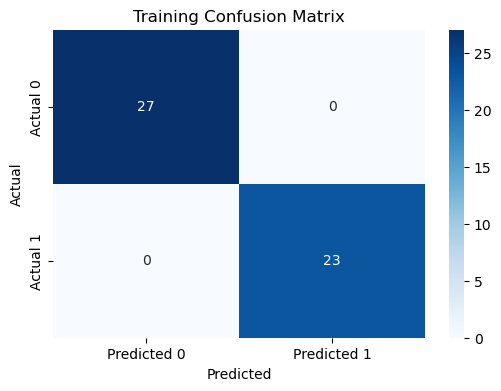


Evaluating on Testing Data:
Testing Accuracy: 0.84

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       0.71      1.00      0.83        20
     Class 1       1.00      0.73      0.85        30

    accuracy                           0.84        50
   macro avg       0.86      0.87      0.84        50
weighted avg       0.89      0.84      0.84        50



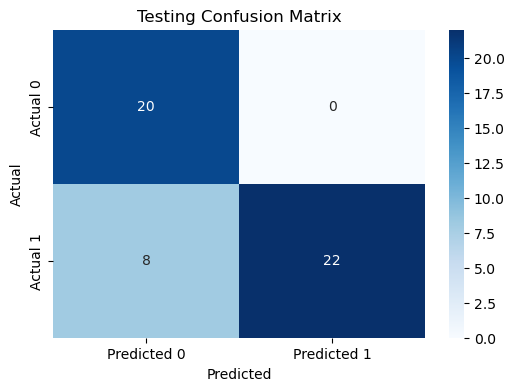

In [16]:
# Evaluate Decision Tree model on both training and testing data
print("\nDecision Tree Model Evaluation:")
evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)

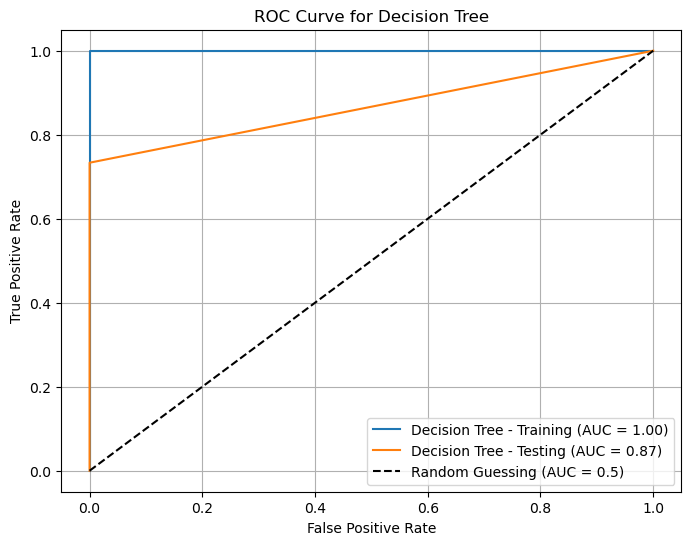

Decision Tree ROC-AUC Score on Training Data: 1.00
Decision Tree ROC-AUC Score on Testing Data: 0.87


In [17]:
# Plot AUC-ROC for Decision Tree on both training and testing data
plot_roc_auc_train_test(dt_classifier, X_train, X_test, y_train, y_test, "Decision Tree")

#### **Random Forest**

In [18]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")

Training Time: 0.0963 seconds


In [19]:
print(sum(y_test),len(y_test))

30 50



Random Forest Model Evaluation:

Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



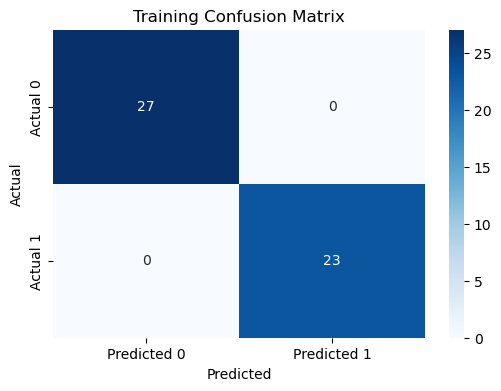


Evaluating on Testing Data:
Testing Accuracy: 0.86

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       0.74      1.00      0.85        20
     Class 1       1.00      0.77      0.87        30

    accuracy                           0.86        50
   macro avg       0.87      0.88      0.86        50
weighted avg       0.90      0.86      0.86        50



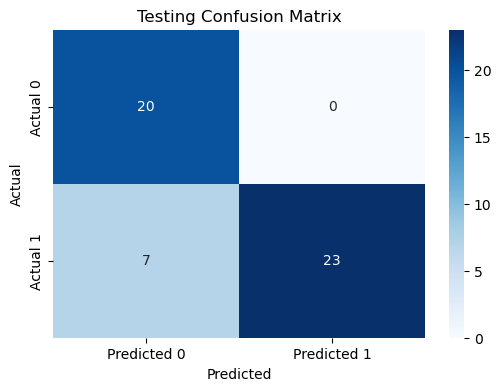

In [20]:
# Evaluate Random Forest model on both training and testing data
print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)

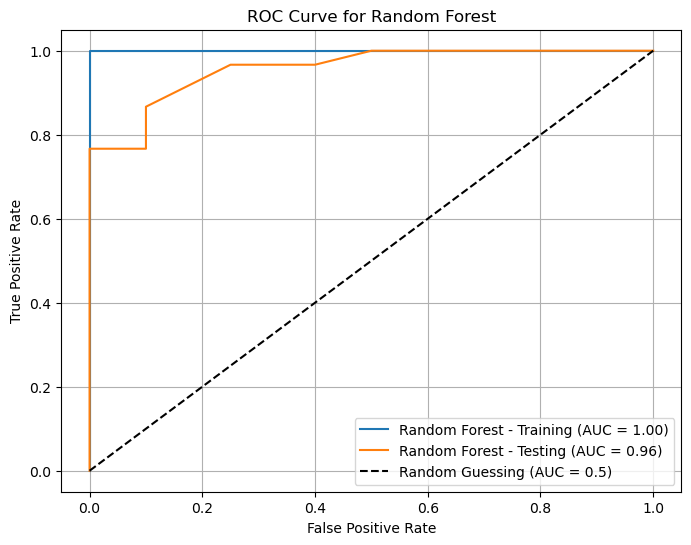

Random Forest ROC-AUC Score on Training Data: 1.00
Random Forest ROC-AUC Score on Testing Data: 0.96


In [21]:
# Plot AUC-ROC for Random Forest on both training and testing data
plot_roc_auc_train_test(rf_classifier, X_train, X_test, y_train, y_test, "Random Forest")

In [22]:
electoral_college = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 30,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 19,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 15,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 28,
    "North Carolina": 16,
    "North Dakota": 3,
    "Ohio": 17,
    "Oklahoma": 7,
    "Oregon": 8,
    "Pennsylvania": 19,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 40,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 4,
    "Wisconsin": 10,
    "Wyoming": 3
}

In [23]:
y_test_pred = dt_classifier.predict(X_test)
dt_df = pd.DataFrame(y_test_pred,columns=['prediction'])
states = pd.read_csv('2023_out_heading_matched.csv')[['state']]
dt_df['state']=states
dt_df['target']=y_test
dt_df['electoral_college_Seats'] = dt_df['state'].map(lambda x: electoral_college[x])
dt_df.groupby(['prediction'])['electoral_college_Seats'].sum().reset_index()

,prediction,electoral_college_Seats
0,0,350
1,1,184


In [24]:
y_test_pred = rf_classifier.predict(X_test)
fdf = pd.DataFrame(y_test_pred,columns=['prediction'])
states = pd.read_csv('2023_out_heading_matched.csv')[['state']]
fdf['state']=states
fdf['target']=y_test
fdf['electoral_college_Seats'] = fdf['state'].map(lambda x: electoral_college[x])
fdf.groupby(['prediction'])['electoral_college_Seats'].sum().reset_index()

,prediction,electoral_college_Seats
0,0,346
1,1,188


In [25]:
fdf

,prediction,state,target,electoral_college_Seats
0,1,Alabama,1,9
1,1,Alaska,1,3
2,0,Arizona,1,11
3,1,Arkansas,1,6
4,0,California,0,55
5,0,Colorado,0,9
6,0,Connecticut,0,7
7,0,Delaware,0,3
8,0,Florida,1,30
9,0,Georgia,1,16


### Debugging and Stress Testing

#### 1. Unit Testing

In [26]:
import unittest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
class TestRandomForest(unittest.TestCase):

    def setUp(self):
        # Load datasets for testing
        self.data_2020 = pd.read_csv('2020_out_heading_matched_out.csv')
        self.data_2023 = pd.read_csv('2023_out_heading_matched_out.csv')

    # Check if both datasets are loaded correctly
    def test_data_loading(self):
        self.assertIsNotNone(self.data_2020, "2020 dataset should load successfully.")
        self.assertIsNotNone(self.data_2023, "2023 dataset should load successfully.")

    # Ensure train-test split is done correctly on dataset
    def test_data_split(self):
        X = self.data_2020.drop('Target', axis=1)
        y = self.data_2020['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.assertEqual(len(X_train) + len(X_test), len(X), "Data split should cover the full dataset.")
        self.assertEqual(len(y_train) + len(y_test), len(y), "Target split should cover the full target column.")

    # Check if the Random Forest model trains without errors
    def test_model_training(self):
        X = self.data_2020.drop('Target', axis=1)
        y = self.data_2020['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        rf_classifier = RandomForestClassifier(random_state=42)
        rf_classifier.fit(X_train, y_train)
        
        # Check if model is trained
        self.assertIsNotNone(rf_classifier, "Model should train successfully.")
        self.assertGreater(len(rf_classifier.estimators_), 0, "The Random Forest model should have trained estimators.")

    # Evaluate Random Forest model's prediction functionality
    def test_evaluation_function(self):
        X = self.data_2020.drop('Target', axis=1)
        y = self.data_2020['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        rf_classifier = RandomForestClassifier(random_state=42)
        rf_classifier.fit(X_train, y_train)
        
        # Check model predictions
        predictions = rf_classifier.predict(X_test)
        self.assertEqual(len(predictions), len(y_test), "Predictions should match the test set size.")
        self.assertIn(predictions[0], [0, 1], "Predictions should be within expected classes.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


.

...
----------------------------------------------------------------------
Ran 4 tests in 0.255s

OK


#### 2. Edge Case Test

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [29]:
# Load the dataset
data = pd.read_csv('2020_out_heading_matched_out.csv')

In [30]:
# Split the dataset into features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Edge case 1: Empty dataset
empty_data = pd.DataFrame()
try:
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(empty_data, y_train)
except ValueError as e:
    print(f"Edge Case Empty Dataset: {e}")

# Edge case 2: All-zero features
X_zero = pd.DataFrame(0, index=np.arange(len(y_train)), columns=X_train.columns)
try:
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_zero, y_train)
except ValueError as e:
    print(f"Edge Case All-Zero Features: {e}")

# Edge case 3: Single-class labels
y_single_class = pd.Series([1] * len(y_train))
try:
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_single_class)
except ValueError as e:
    print(f"Edge Case Single-Class Labels: {e}")


Edge Case Empty Dataset: at least one array or dtype is required


##### Checking for empty datasets

In [32]:
# Check if dataset is empty before training
if X_train.empty or y_train.empty:
    print("Training dataset is empty. Please provide valid data.")
else:
    rf_classifier.fit(X_train, y_train)
    print("Model trained successfully.")


Model trained successfully.


#### 3. Scalability Test

In [33]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
# Simulate a larger dataset by duplicating rows
X_large = pd.concat([X_train] * 10, ignore_index=True)  # Increase dataset size by 10x
y_large = pd.concat([y_train] * 10, ignore_index=True)

In [35]:
# Train on the simulated large dataset
rf_classifier_large = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_classifier_large.fit(X_large, y_large)
print(f"Scalability Test Training Time: {time.time() - start_time:.4f} seconds")

Scalability Test Training Time: 0.1102 seconds


#### 4. Load Testing

In [36]:
# Load testing with multiple predictions
start_time = time.time()
for i in range(1000):  # Simulate 1000 prediction calls
    _ = rf_classifier.predict(X_test)
print(f"Load Testing Prediction Time for 1000 calls: {time.time() - start_time:.4f} seconds")

Load Testing Prediction Time for 1000 calls: 3.3956 seconds


#### 5. Speed/Latency Test

In [37]:
# Measure latency for training
rf_classifier = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_classifier.fit(X_train, y_train)
train_latency = time.time() - start_time
print(f"Training Latency: {train_latency:.4f} seconds")

# Measure latency for a single prediction
start_time = time.time()
_ = rf_classifier.predict(X_test.iloc[:1])  # Predict on a single sample
prediction_latency = time.time() - start_time
print(f"Single Prediction Latency: {prediction_latency:.4f} seconds")

Training Latency: 0.0899 seconds
Single Prediction Latency: 0.0050 seconds


#### 6. Corrected Errors

In [38]:
# Ensure no missing values in training data
if X_train.isnull().sum().any() or y_train.isnull().any():
    X_train.fillna(X_train.mean(), inplace=True)  # Use mean imputation for numerical data
    y_train.fillna(y_train.mode()[0], inplace=True)  # Use mode for categorical target if applicable

# Check and convert data types if needed (e.g., convert any string columns to numeric)
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert and fill non-numeric with 0
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

print("Model trained successfully with corrected data.")

Model trained successfully with corrected data.


There were no missing values in the dataset.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
# Parameter tuning for optimization
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [41]:
# Best parameters and evaluation with optimized model
optimized_rf = grid_search.best_estimator_
print("Optimized Random Forest Parameters:", grid_search.best_params_)

Optimized Random Forest Parameters: {'max_depth': 10, 'n_estimators': 100}



Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        18
     Class 1       1.00      1.00      1.00        17

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



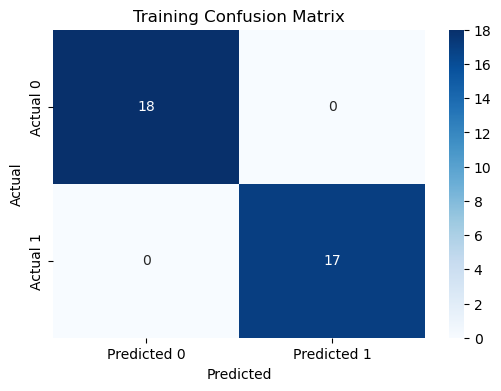


Evaluating on Testing Data:
Testing Accuracy: 0.93

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.89      0.94         9
     Class 1       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



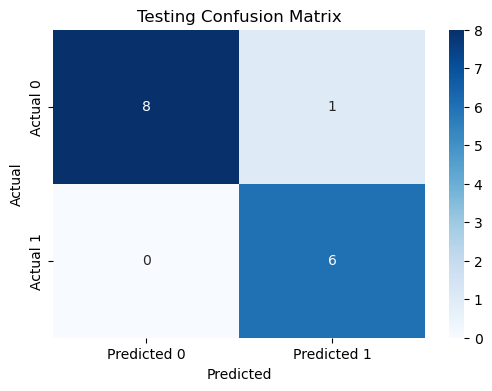

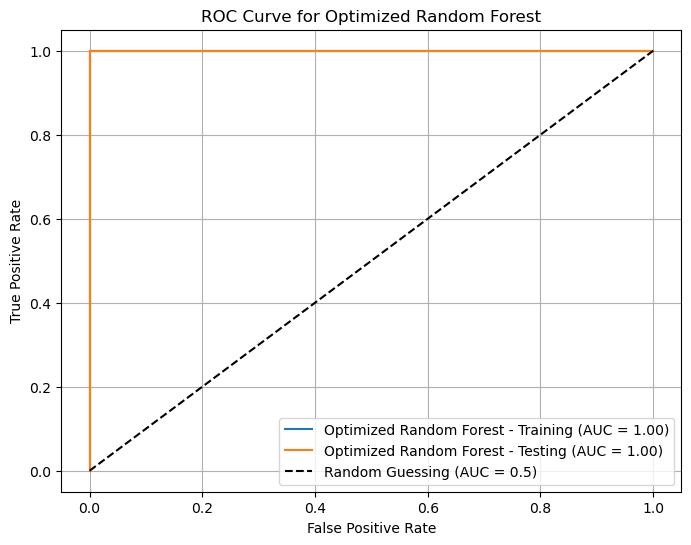

Optimized Random Forest ROC-AUC Score on Training Data: 1.00
Optimized Random Forest ROC-AUC Score on Testing Data: 1.00


In [42]:
# Evaluate the optimized model (you can define evaluate_model function separately)
evaluate_model(optimized_rf, X_train, X_test, y_train, y_test)

# Plot the ROC curve (assuming you have plot_roc_auc_train_test defined)
plot_roc_auc_train_test(optimized_rf, X_train, X_test, y_train, y_test, "Optimized Random Forest")

### Feature Importance

In [43]:
# Calculate feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [44]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [45]:
# Print the top features
print("Top Features:")
print(importance_df.head(10))

Top Features:
                                               Feature  Importance
288  INCOMEInThePast12Months_PastYearInflation_Adju...    0.057579
282  INCOMEInThePast12Months_PastYearInflation_Adju...    0.047417
361                            LastElection_Republican    0.043828
359                       LastThirdElection_Republican    0.032956
149  EDUCATIONALAttainmentPeople25YearsAndOverBache...    0.030806
360                      LastSecondElection_Republican    0.025540
301  POVERTYRatesForFamiliesAndPeopleForWhomPoverty...    0.025058
230  OCCUPATIONCivilianEmployedPeople16YearsAndOver...    0.024543
290  INCOMEInThePast12Months_PastYearInflation_Adju...    0.022720
232  OCCUPATIONMaleCivilianEmployedPeople16YearsAnd...    0.022665


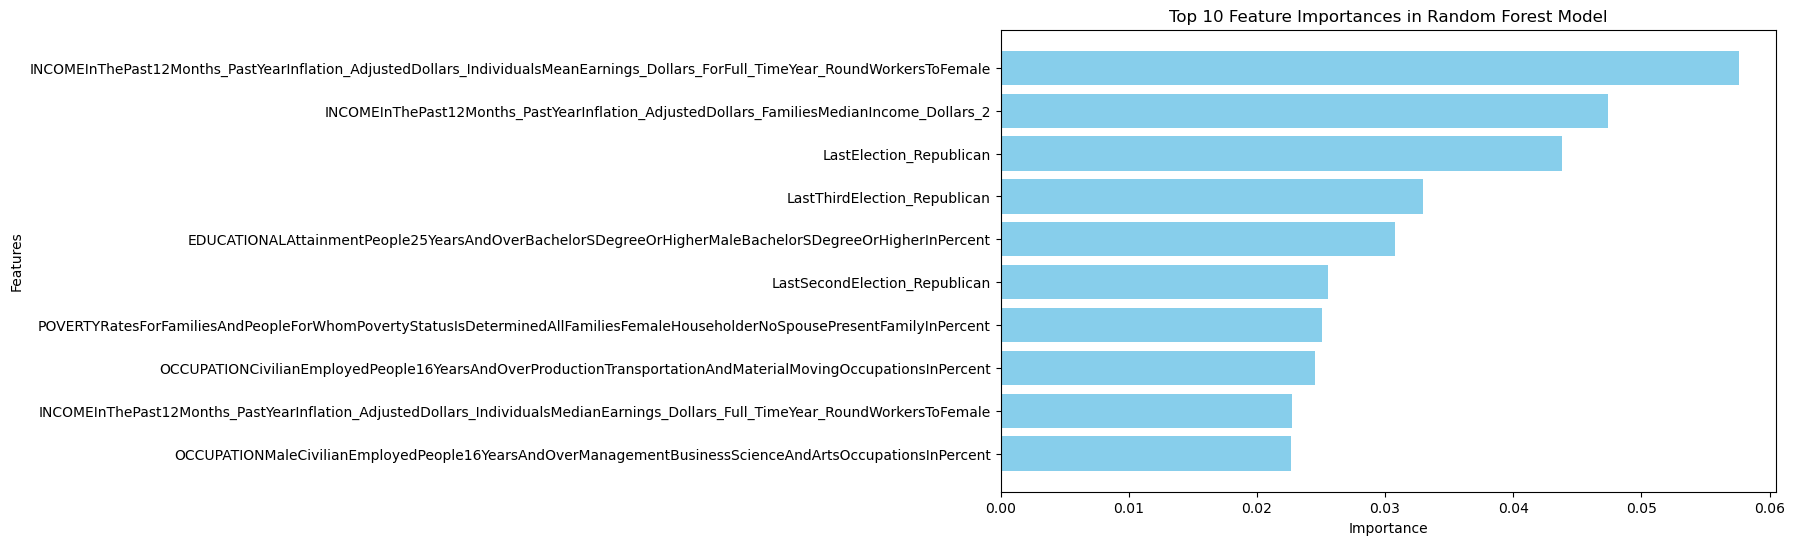

In [46]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances in Random Forest Model")
plt.show()

### Visualization of Testing

unit testing

In [47]:
# Visualize Training vs Testing Dataset Distribution
train_size = len(X_train)
test_size = len(X_test)

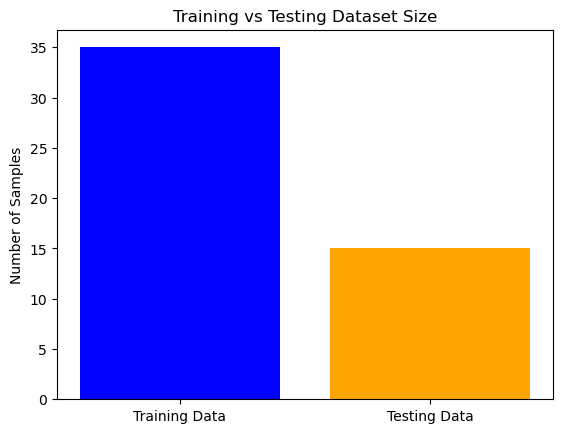

In [48]:
plt.bar(['Training Data', 'Testing Data'], [train_size, test_size], color=['blue', 'orange'])
plt.title('Training vs Testing Dataset Size')
plt.ylabel('Number of Samples')
plt.show()

In [49]:
# Example Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

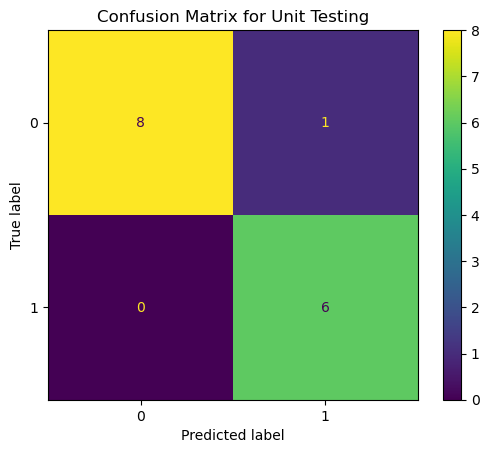

In [50]:
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Unit Testing')
plt.show()

Edge Case Tesing

In [51]:
edge_cases = {
    "Edge Case": ["Empty Dataset", "All-Zero Features", "Single-Class Labels"],
    "Result": ["Failed (ValueError)", "Failed (ValueError)", "Failed (ValueError)"],
}
edge_cases_df = pd.DataFrame(edge_cases)

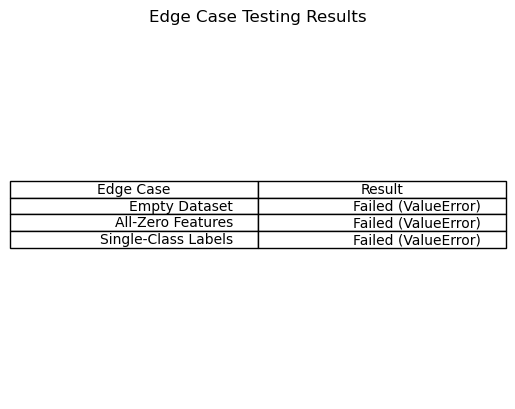

In [52]:
# Plot Edge Case Results
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=edge_cases_df.values, colLabels=edge_cases_df.columns, loc='center')
plt.title('Edge Case Testing Results')
plt.show()

In [53]:
# Example Training Time vs Dataset Size
dataset_sizes = [len(X_train) * i for i in range(1, 11)]  # Simulated sizes
training_times = []

In [54]:
for size in dataset_sizes:
    X_large = pd.concat([X_train] * (size // len(X_train)), ignore_index=True)
    y_large = pd.concat([y_train] * (size // len(y_train)), ignore_index=True)

    start_time = time.time()
    rf_classifier.fit(X_large, y_large)
    training_times.append(time.time() - start_time)

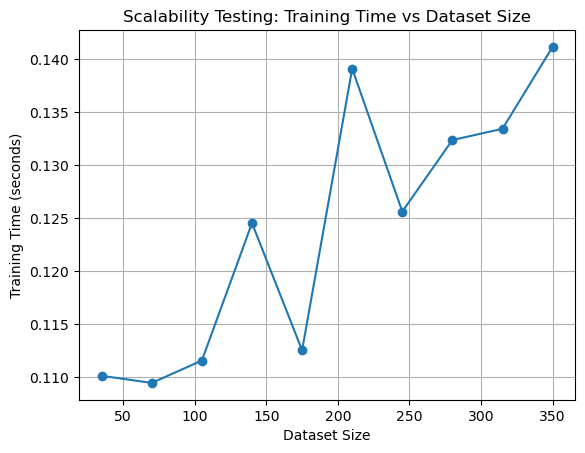

In [55]:
plt.plot(dataset_sizes, training_times, marker='o')
plt.title('Scalability Testing: Training Time vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Training Time (seconds)')
plt.grid()
plt.show()